# Function Code

In [1]:
import random
import heapq
import numpy as np

#function to create an adjacency matrix of varying vertices and edges      
def random_directed_adjacency_matrix(vertex, edge):   
    matrix = [[0 for i in range(vertex)] for j in range(vertex)]

    while edge>0:
        for x in range(vertex):
            for y in range(vertex):
                edger=random.randint(0,100)
                if edger==1 and x!=y and matrix[x][y]==0 and edge>0:
                    matrix[x][y]= random.randint(1,10)
                    edge-=1

    return matrix
#convert maxtrix to adj list
def convert(matrix):
    adj_list={}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j]!=0:
                if i not in adj_list:
                    adj_list[i]= [[j, matrix[i][j]]]
                
                else:
                    adj_list[i].append([j, matrix[i][j]])
    
    return adj_list

def add_edge(graph, increments):
    matrix= graph
    
    while increments>0:
        for x in range(len(graph)):
            for y in range(len(graph[x])):
                edger=random.randint(0,100)
                if edger==1 and x!=y and matrix[x][y]==0:
                    matrix[x][y]= random.randint(1,5)
                    increments-=1
    return matrix

'''
matrix= random_directed_adjacency_matrix(100,200)
adjacency_list= convert(matrix)

print(matrix)
print()
print('Adjacency List: ')
print('Distance array:')
print(dijkstra_lists(adjacency_list, 2, 100)[0])
print('Pi array:')
print(dijkstra_lists(adjacency_list, 2, 100)[1])
print()
print('Adjacency Matrix: ')
print('Distance array:')
print(dijkstra_matrix(matrix, 2)[0])
print('Pi array:')
print(dijkstra_matrix(matrix, 2)[1])
'''


"\nmatrix= random_directed_adjacency_matrix(100,200)\nadjacency_list= convert(matrix)\n\nprint(matrix)\nprint()\nprint('Adjacency List: ')\nprint('Distance array:')\nprint(dijkstra_lists(adjacency_list, 2, 100)[0])\nprint('Pi array:')\nprint(dijkstra_lists(adjacency_list, 2, 100)[1])\nprint()\nprint('Adjacency Matrix: ')\nprint('Distance array:')\nprint(dijkstra_matrix(matrix, 2)[0])\nprint('Pi array:')\nprint(dijkstra_matrix(matrix, 2)[1])\n"

(A) Matrix + Array PQ

In [2]:
#greedy algo for matrix using array for pq
def dijkstra_matrix(graph, source): 
     
    d = [float("inf") for _ in range(len(graph))] 
    s = [False for _ in range(len(graph))] 
    pi = [-1 for _ in range(len(graph))] 
    d[source]=0 
     
    queue_array = [[d[i], i] for i in range(len(graph))] # initialize queue with all vertices 
     
    while queue_array: 
        # sort queue by distance values 
        queue_array.sort()                                    
        shortest_distance, shortest_index = queue_array.pop(0) # extract minimum value vertex from queue 
         
        if s[shortest_index]: 
            continue # skip if vertex already processed 
         
        s[shortest_index] = True # mark vertex as processed 
         
        for i in range(len(graph[shortest_index])): 
            if graph[shortest_index][i] != 0 and not s[i] and d[i] > d[shortest_index] + graph[shortest_index][i]: 
                d[i] = d[shortest_index] + graph[shortest_index][i] 
                pi[i] = shortest_index 
                # update value of vertex in queue 
                for j in range(len(queue_array)): 
                    if queue_array[j][1] == i: 
                        queue_array[j][0] = d[i] 
                        break 
         
    return d, pi


(B) Adj List + Min Heap PQ

In [3]:
#greedy algo for adj list using minimising heap for pq
def dijkstra_lists(g, source, vertices):

    d = [float("inf") for node in range(vertices)]
    pi = [-1 for node in range(vertices)]
    S = [False for node in range(vertices)]
    
    d[source] = 0
    queue_heap = [[d[v],v] for v in range(len(d))]
    heapq.heapify(queue_heap)
    
    while len(queue_heap) != 0:
        # [1] because only needs the v value
        vertex = (heapq.heappop(queue_heap))[1] 
        S[vertex] = True

        # For each v adjacent to u (only from u to v direction)
        if vertex in g:
            for i in range(len(g[vertex])):
                adjacent = g[vertex][i][0]
                weight_uv = g[vertex][i][1]

                if (S[adjacent] != True) and (d[adjacent] > (d[vertex] + weight_uv)):
                    # To remove v from queue
                    for j in range(len(queue_heap)): 
                        if queue_heap[j][1] == adjacent:
                            queue_heap.pop(j)
                            
                            # Re-heapify
                            heapq.heapify(queue_heap) 
                            break
                        
                    d[adjacent] = d[vertex] + weight_uv
                    pi[adjacent] = vertex
                        
                    # Insert v into queue
                    heapq.heappush(queue_heap, [d[adjacent],adjacent]) 
                    
    return d, pi  

# Time Complexity

In [4]:
import time
import matplotlib.pyplot as plt


# (a) Fixed V=200, increment E, source=0

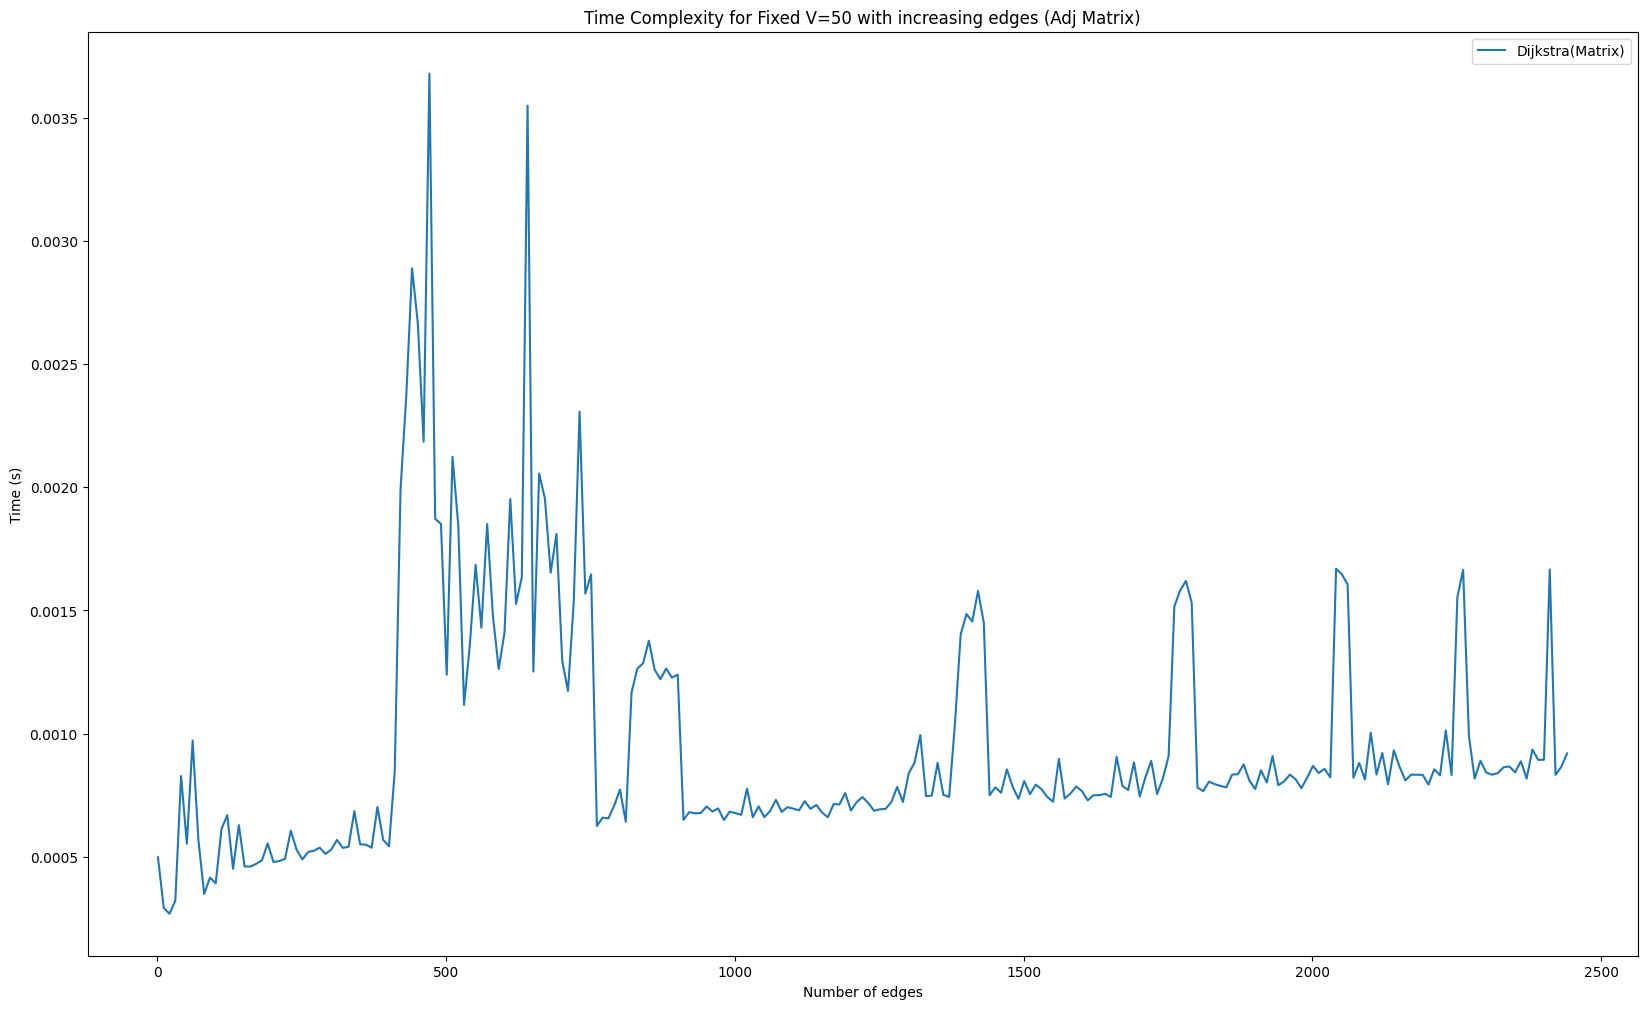

In [5]:
#Plot graph for Adj Matrix 
matrix_times = []

V=50
max_edges = V**2-V
source=0 
iterations=100

plt.figure(figsize=(20, 12))

for edges in range(1, max_edges+1,10):

    graph = random_directed_adjacency_matrix(V,edges)
    matrix_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed V=50 with increasing edges (Adj Matrix)')
plt.plot(range(1, max_edges+1,10), matrix_times, label='Dijkstra(Matrix)')
plt.xlabel('Number of edges')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#using same graph but add new edges
matrix_times = []

V=100
max_edges = V**2-V
source=0 
iterations=2
graph = random_directed_adjacency_matrix(V,0)

plt.figure(figsize=(20, 12))

while (edges<max_edges):

    edges+=10
    graph = add_edge(graph,edges)
    matrix_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed V=50 with increasing edges (Adj Matrix)')
plt.plot(range(1, max_edges+1,10), matrix_times, label='Dijkstra(Matrix)')
plt.xlabel('Number of edges')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#Plot graph for Adj List 
list_times = []
V=50
max_edges = V**2-V
source=0 
iterations=100

plt.figure(figsize=(20, 12))

for edges in range(1, max_edges+1,10):

    graph = random_directed_adjacency_matrix(V,edges)
    adj_list = convert(graph)
    list_time=0
    # measure time for list
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)

plt.title('Time Complexity for Fixed V=50 with increasing edges(Adj List)')
plt.plot(range(1, max_edges+1,10), list_times, label='Dijkstra(List)')
plt.xlabel('Number of edges')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
# Plot both together
matrix_times = []
list_times = []

V=50
max_edges = V**2-V
source=0 
iterations=100

plt.figure(figsize=(20, 12))

for edges in range(1, max_edges+1,10):

    graph = random_directed_adjacency_matrix(V,edges)
    adj_list = convert(graph)
    matrix_time=0
    list_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)
    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed V=50 with increasing edges')
plt.plot(range(1, max_edges+1,10), matrix_times, label='Dijkstra(Matrix)')
plt.plot(range(1, max_edges+1,10), list_times, label='Dijkstra(List)')
plt.xlabel('Number of edges')
plt.ylabel('Time (s)')
plt.legend()
plt.show()




# (b)Fixed E = V^2 - V (max), Increment V, source = 0 

In [ ]:
#Plot graph for Adj Matrix 
matrix_times = []
source=0 
iterations=10


plt.figure(figsize=(20, 12))

for V in range(2, 201):
    max_edges = V*V - V 
    graph = random_directed_adjacency_matrix(V,max_edges)
    matrix_time=0

    # measure time for matrix
    for i in range(0, iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)
      if (matrix_time > 10): 
        break #failsafe incase prog takes too long? 

    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices (Adj Matrix)')
plt.plot(range(2, 201), matrix_times, label='Dijkstra(Matrix)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#Plot graph for Adj List 
list_times = []
source=0 
iterations=100

plt.figure(figsize=(20, 12))

for V in range(2, 201):
    max_edges = V**2-V
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    list_time=0
    # measure time for list
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maxinum no of edges) with increasing vertices (Adj List)')
plt.plot(range(2, 201), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#Plot graph for Adj Matrix 
matrix_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(2, 201):
    max_edges = V**2 - V 
    graph = random_directed_adjacency_matrix(V,max_edges)
    matrix_time=0

    # measure time for matrix
    for i in range(0, iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices (Adj Matrix)')
plt.plot(range(2, 201), matrix_times, label='Dijkstra(Matrix)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
# Plot both together
matrix_times = []
list_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(2, 201):
    max_edges = V**2 - V 
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    matrix_time=0
    list_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)
    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices')
plt.plot(range(2, 201), matrix_times, label='Dijkstra(Matrix)')
plt.plot(range(2, 201), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#test above but for smaller range
matrix_times = []
list_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(2, 25):
    max_edges = V**2 - V 
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    matrix_time=0
    list_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)
    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices')
plt.plot(range(2, 25), matrix_times, label='Dijkstra(Matrix)')
plt.plot(range(2, 25), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#Plot graph for Adj Matrix NEW 10:46 PM VARYING V FROM 10 TO 200 
matrix_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(10, 200):
    max_edges = 10**2 - 10 
    graph = random_directed_adjacency_matrix(V,max_edges)
    matrix_time=0

    # measure time for matrix
    for i in range(0, iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = 90 with increasing vertices (Adj Matrix)')
plt.plot(range(10, 200), matrix_times, label='Dijkstra(Matrix)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
#Plot graph for Adj List 
list_times = []
source=0 
iterations=100

plt.figure(figsize=(20, 12))

for V in range(10, 1000):
    max_edges = 10**2-10
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    list_time=0
    # measure time for list
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)

plt.title('Time Complexity for Fixed E = 90 with increasing vertices (Adj List)')
plt.plot(range(10, 1000), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
# Plot both together
matrix_times = []
list_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(10, 200):
    max_edges = 90
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    matrix_time=0
    list_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)
    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices')
plt.plot(range(10, 200), matrix_times, label='Dijkstra(Matrix)')
plt.plot(range(10, 200), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

In [ ]:
# Test above but for smaller range
matrix_times = []
list_times = []
source=0 
iterations=100


plt.figure(figsize=(20, 12))

for V in range(10, 25):
    max_edges = 90
    graph = random_directed_adjacency_matrix(V,max_edges)
    adj_list = convert(graph)
    matrix_time=0
    list_time=0

    # measure time for matrix
    for i in range(0,iterations):
      start_time = time.time()
      dijkstra_matrix(graph, source)
      matrix_time += (time.time() - start_time)

      start_time = time.time()
      dijkstra_lists(adj_list, source, V)
      list_time += (time.time() - start_time)
      
    list_times.append(list_time/iterations)
    matrix_times.append(matrix_time/iterations)

plt.title('Time Complexity for Fixed E = V^2-V (maximum no of edges) with increasing vertices [V=10-25]')
plt.plot(range(10, 25), matrix_times, label='Dijkstra(Matrix)')
plt.plot(range(10, 25), list_times, label='Dijkstra(List)')
plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.legend()
plt.show()